In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/water_main_breaks.csv")
wmb = geopandas.read_file("zip://data/water_main_breaks-shp.zip")
ms = geopandas.read_file("zip://data/Zoning_Districts-shp.zip")
Dec = wmb[wmb["break_mont"]==12].copy(deep = True)
Jan = wmb[wmb["break_mont"]==1].copy(deep = True)
Feb = wmb[wmb["break_mont"]==2].copy(deep = True)

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

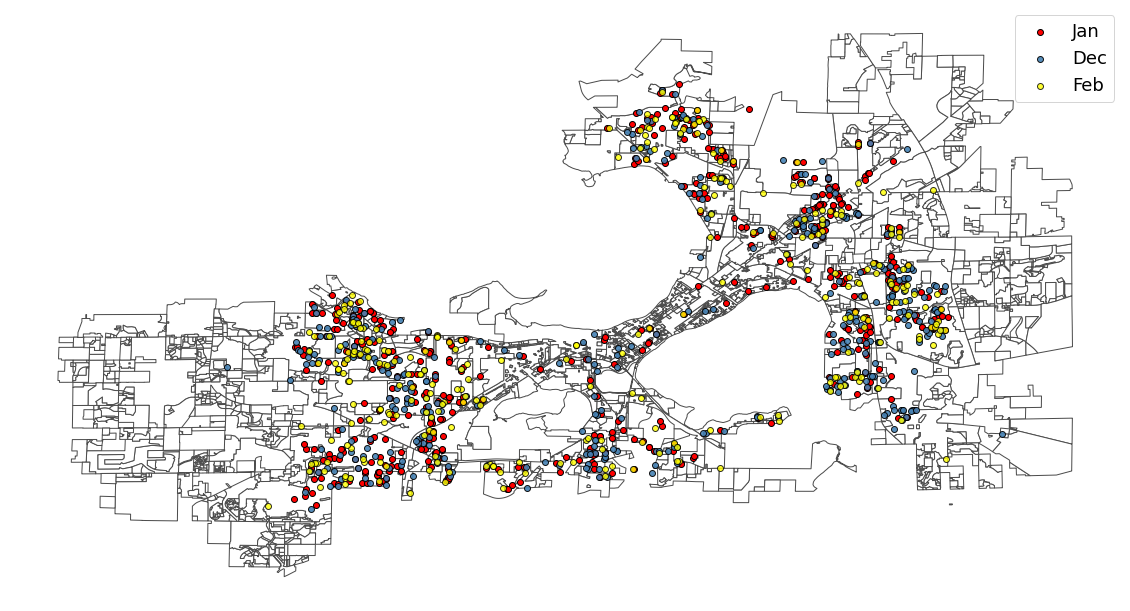

In [14]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "0.3",ax=ax)
Jan.plot(color = "red",edgecolor = "black",ax=ax)
Dec.plot(color = "steelblue",edgecolor = "black",ax=ax,alpha = 0.9)
Feb.plot(color = "yellow",edgecolor = "black",ax=ax,alpha = 0.8)
ax.legend(["Jan","Dec","Feb"])
ax.axis("off")

In [6]:
df = pd.read_csv("data/count and temperature 2018.csv")

In [7]:
Jan = df[df["month"]==1]
Mar = df[df["month"]==3]

In [8]:
matplotlib.rcParams.update({"font.size":18,'figure.figsize': (25, 10)})
def get_ax():
    fig,(ax1,ax3) = plt.subplots(1,2,sharey = "row")
    ax2 = ax1.twinx()
    ax1.set_ylabel('Count',color = "black")
    ax2.set_ylabel('Temperature',color = "red")
    ax2.tick_params(axis='y', labelcolor="red")
    ax1.tick_params(axis='y', labelcolor="black")
    
    ax4 = ax3.twinx()
    ax3.set_ylabel('Count',color = "black")
    ax4.set_ylabel('Temperature',color = "red")
    ax4.tick_params(axis='y', labelcolor="red")
    ax3.tick_params(axis='y', labelcolor="black")
#     ax1.set_xlabel("Date")
#     ax2.set_xlabel("Date")
#     ax3.set_xlabel("Date")
#     ax4.set_xlabel("Date")
#    ax4.set_yticks([-10,0,10,20,30])
#    ax4.set_yticklabels([-10,0,10,20,30])
    return ax1,ax2,ax3,ax4

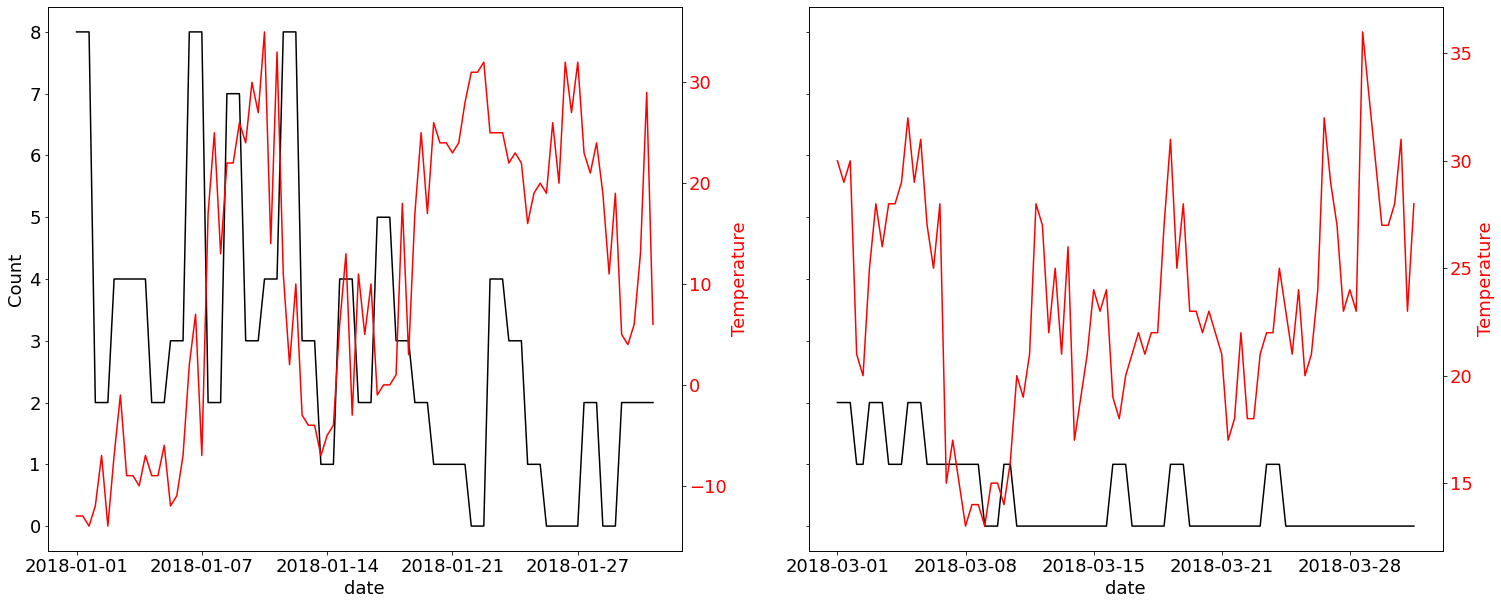

In [10]:
ax1,ax2,ax3,ax4 = get_ax()
Jan.plot.line(x = "date",y="total",ax=ax1,color = "black",legend = False)
Jan.plot.line(x = "date",y="TMIN",ax=ax2,color = "red",legend = False)
Mar.plot.line(x = "date",y="total",ax=ax3,color = "black",legend = False)
Mar.plot.line(x = "date",y="TMIN",ax=ax4,color = "red",legend = False)
plt.savefig("count and temperature.pdf")